In [1]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [2]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


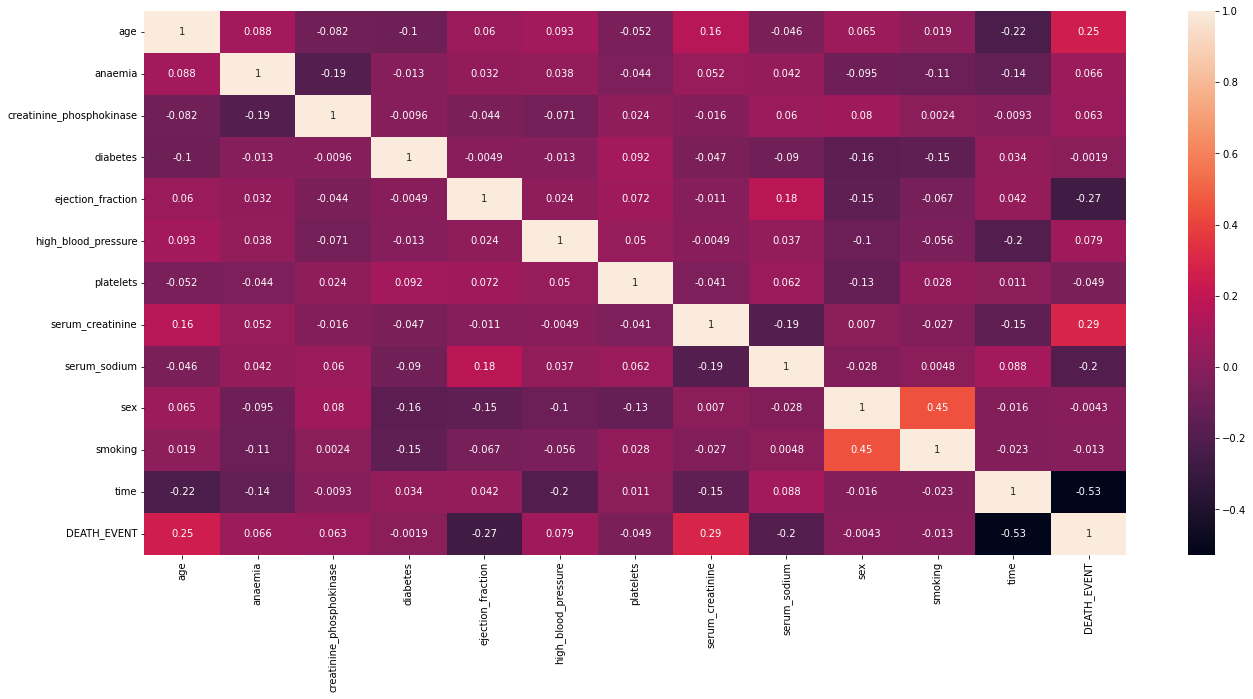

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

rs = np.random.RandomState(0)
corr = df.corr()
plt.figure(figsize=(22,10))
sns.heatmap(corr,annot=True)
plt.show()

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.skew()

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


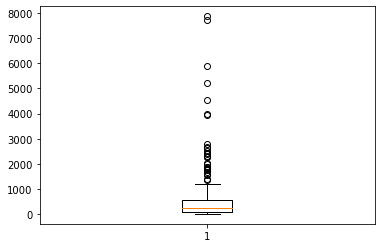

In [9]:

plt.boxplot(df['creatinine_phosphokinase'])
plt.show()

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
Q1= df["creatinine_phosphokinase"].quantile(0.25)
Q3= df["creatinine_phosphokinase"].quantile(0.75)
IQR = Q3 - Q1
IQR

465.5

In [12]:
df.shape

(299, 13)

In [13]:
df = df[~((df['creatinine_phosphokinase'] < (Q1 - 1.5 * IQR)) | (df['creatinine_phosphokinase'] > (Q3 + 1.5 *IQR )))]

In [14]:
df.shape

(270, 13)

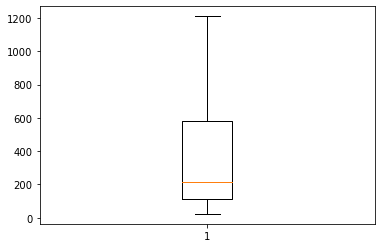

In [15]:
plt.boxplot(df['creatinine_phosphokinase'])
plt.show()

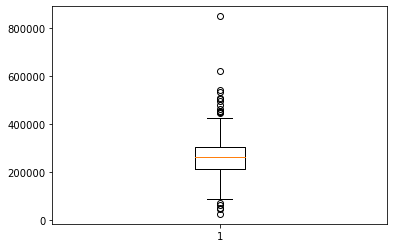

In [16]:
plt.boxplot(df['platelets'])
plt.show()

In [17]:
Q11= df["platelets"].quantile(0.25)
Q33= df["platelets"].quantile(0.75)
IQR1 = Q3 - Q1
IQR1

465.5

In [18]:
df = df[~((df['platelets'] < (Q11 - 1.5 * IQR1)) | (df['platelets'] > (Q33 + 1.5 *IQR1 )))]

In [19]:
df.shape

(138, 13)

In [20]:
df= df.reset_index(drop=True)

In [21]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
133    0
134    0
135    0
136    0
137    0
Name: DEATH_EVENT, Length: 138, dtype: int64

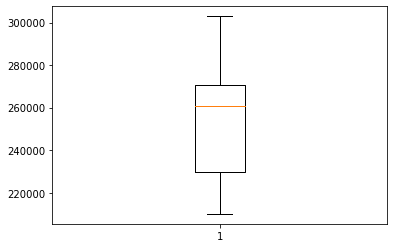

In [22]:
plt.boxplot(df['platelets'])
plt.show()

In [23]:
df1 = df['DEATH_EVENT']

In [24]:
df = df.drop("DEATH_EVENT", axis=1)

In [25]:
df1

0      1
1      1
2      1
3      1
4      1
      ..
133    0
134    0
135    0
136    0
137    0
Name: DEATH_EVENT, Length: 138, dtype: int64

In [26]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
2,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10
3,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10
4,50.0,1,168,0,38,1,276000.00,1.1,137,1,0,11


## RANDOM FOREST


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,df1,test_size=0.15,random_state=22)
y_test.shape

(21,)

NORMLIZATION


In [28]:
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score

st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test) 
accuracy_score(y_pred,y_test)*100

95.23809523809523

Random forest 95%

## ERROR accurcy  MAE



In [29]:
from sklearn.metrics import mean_absolute_error
#dataset_pred = lin.predict(test_set)
linr = mean_absolute_error(y_pred,y_test)
linr

0.047619047619047616